Acurácia: 0.743
Precisão: 0.761
Recall: 0.728
F1-score: 0.744


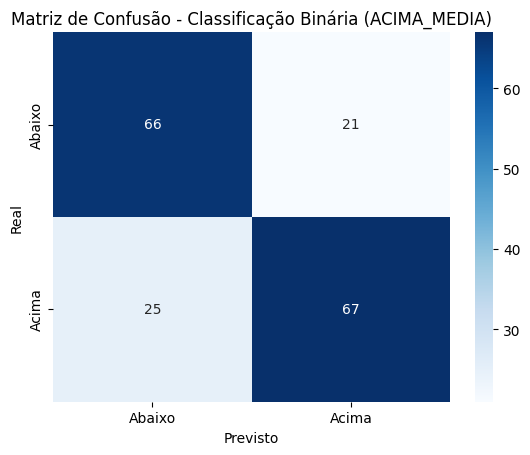

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregamento dos dados
df = pd.read_csv("campanhas.csv")
df[['H1', 'H2', 'CTA']] = df[['H1', 'H2', 'CTA']].fillna('')

# 2. Preparação do texto
df['texto_completo'] = df['H1'] + ' ' + df['H2'] + ' ' + df['CTA']

# 3. Vetorização com TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['texto_completo'])

# 4. Variável alvo: binária (0 ou 1)
y = df['ACIMA_MEDIA']

# 5. Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2)

# 6. Treinamento do modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# 7. Predição e avaliação
y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 8. Exibição das métricas
print(f"Acurácia: {acc:.3f}")
print(f"Precisão: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

# 9. Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Abaixo", "Acima"], yticklabels=["Abaixo", "Acima"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Classificação Binária (ACIMA_MEDIA)")
plt.show()
